In [1]:
# Алексеев Д.П. (DSU-4,FEML-8)
# Домашнее задание к лекции «Работа с переменными» (#6).
# Исправлено: Нормализация признаков посредством StandrdScaler, а не по формуле z-масштабирования

# Задание:
# Потренируем навыки, полученные на практическом занятии. 
# Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, 
# и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

# Данные вы сможете получить, исполнив следующий код:
# from sklearn.datasets import load_boston
# import pandas as pd
# data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

# Переменная, которую надо предсказать - ’MEDV’.

# Прочитать информацию о содержимом датасета:
# print(load_boston()[‘DESCR’])

In [1]:
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# По data.info() мы видим, что незаполненные (null) и категориальные переменные отсутствуют. 
# То есть заполнение пропусков и one-hot-encoding нет смысла использовать.
# Также все признаки являются числовыми (int64, float64). Данных больше, чем признаков (506 строк, 13 входящих признаков).
# Для начала неплохо. Попробуем разбить данные на трейн/тест выборки и обучить модель "как есть" для оценки исходного качества.
set_1 = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
set_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
# целевая переменная
target = data['MEDV']
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
# Будем использовать линейную регрессию для тестирования качества данных. Определим функцию для оптимизации процесса.
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)  
    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)

In [8]:
# оценим скор на базовом датасете (все признаки)
get_score(set_1, target)
# базовый score = 0.7112260057484905.
# Не так уж плохо, но попробуем улучшить.

0.7112260057484905

Построим тепловую карту для того, чтобы оценить признаки, наиболее коррелирующие с целевой переменной.

<AxesSubplot:>

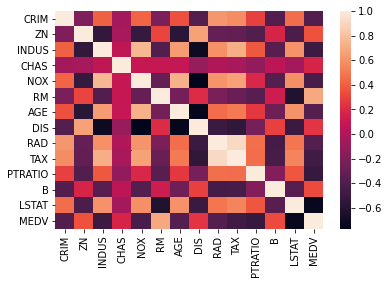

In [9]:
sns.heatmap(data.corr())
# из тепловой карты мы видим, что наблюдается ярко выраженная положительная корреляция (прямо пропорционально) 
# по переменной RM (кол-во комнат), что логично - с увеличением кол-ва комнат растет стоимость недвижимости.

# Также можем заметить, что 100%-ной корреляции (или близкой к ней) с целевой переменной нет ни у одного из признаков, 
# т.е. 100%-ные кандидаты на выбывание из входящих признаков отсутствуют.

In [10]:
# Исходя из анализа тепловой карты, попробуем оставить в датасете только признак 'RM' (кол-во комнат) и посмотрим, что получится.
set_2 = data[['RM']]

In [11]:
get_score(set_2, target)
# базовый score (set_1) = 0.7112260057484905.
# set_2 = 0.4584649934303069
# Качество предсказаний существенно ухудшилось. Следовательно, нет смысла выкидывать переменные из рассмотрения 
# только на основании корреляции признаков. 

0.4584649934303069

Будем действовать в другом направлении. 
По анализу data.info() можно сделать вывод, что признаки INDUS, AGE, DIS, TAX, PTRATIO, B, LSTAT можно нормализовать.
А признак RM округлить до целых, т.к. кол-во комнат не может быть дробной величиной.

In [29]:
# сделаем копию исходного датасета перед нормализацией
data_copy = data.copy()

In [30]:
cols_to_norm = data_copy[['INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
cols_to_norm

,INDUS,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,2.31,65.2,4.0900,296,15.3,396.90,4.98
1,7.07,78.9,4.9671,242,17.8,396.90,9.14
2,7.07,61.1,4.9671,242,17.8,392.83,4.03
3,2.18,45.8,6.0622,222,18.7,394.63,2.94
4,2.18,54.2,6.0622,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...
501,11.93,69.1,2.4786,273,21.0,391.99,9.67
502,11.93,76.7,2.2875,273,21.0,396.90,9.08
503,11.93,91.0,2.1675,273,21.0,396.90,5.64
504,11.93,89.3,2.3889,273,21.0,393.45,6.48


In [31]:
target = data_copy['MEDV']

data_copy['RM'] = data_copy['RM'].apply(lambda x: round(x,0))

scaler = StandardScaler()
data_copy[['INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']] = scaler.fit_transform(cols_to_norm)

# при нормализации попробуем обойтись без встроенного StandardScaler'a, применим формулу Z-масштабирования из вебинара
# (которая сделает нормализацию тем же способом, что StandardScaler):
# for i in cols_to_norm:
#     data_copy[i] -= data_copy[i].mean() #вычитаем из каждого конкретного значения среднее значение по колонке
#     data_copy[i] /= data_copy[i].std() #делим на стандартное отклонение

data_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,-1.287909,0,0.538,7.0,-0.120013,0.140214,1,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,0.02731,0.0,-0.593381,0,0.469,6.0,0.367166,0.557160,2,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,0.02729,0.0,-0.593381,0,0.469,7.0,-0.265812,0.557160,2,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,0.03237,0.0,-1.306878,0,0.458,7.0,-0.809889,1.077737,3,-1.106115,0.113032,0.416163,-1.361517,33.4
4,0.06905,0.0,-1.306878,0,0.458,7.0,-0.511180,1.077737,3,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.115738,0,0.573,7.0,0.018673,-0.625796,1,-0.803212,1.176466,0.387217,-0.418147,22.4
502,0.04527,0.0,0.115738,0,0.573,6.0,0.288933,-0.716639,1,-0.803212,1.176466,0.441052,-0.500850,20.6
503,0.06076,0.0,0.115738,0,0.573,7.0,0.797449,-0.773684,1,-0.803212,1.176466,0.441052,-0.983048,23.9
504,0.10959,0.0,0.115738,0,0.573,7.0,0.736996,-0.668437,1,-0.803212,1.176466,0.403225,-0.865302,22.0


In [32]:
# попробуем теперь оценить качество предсказаний.
set_3 = data_copy[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

get_score(set_3, target)
# базовый score (set_1) = 0.7112260057484905.
# score (set_3) = 0.7248493104687763
# Видим, что качество незначительно улучшилось.

0.7248493104687765

Предположим, что dummy-переменная CHAS (пересечение дороги рекой??) введена в датасет неспроста))
Посмотрим, можно ли ее выкинуть из модели и что это даст.

In [15]:
data_copy['CHAS'].value_counts()
# мы видим, что эта переменная равна 1 только в 35-и случаях из 506-и.
# Попробуем её выкинуть и посчитать скор.

0    471
1     35
Name: CHAS, dtype: int64

In [16]:
set_4 = data_copy[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

get_score(set_4, target)
# базовый score (set_1) = 0.7112260057484905.
# score (set_3) = 0.7248493104687763
# score (set_4) = 0.7229109775291522
# Видим, что качество упало, поэтому нет смысла выкидывать переменную CHAS.

0.7229109775291522

In [ ]:
# Вывод: путем нормализации признаков удалось улучшить качество предсказаний с базового score (set_1) = 0.7112260057484905
# до score (set_3) = 0.7248493104687763